In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('adult.csv')
data.shape

(32561, 15)

Data cleaning/preprocessing
1. finding null values

In [3]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

2. in categorical data like workclass,education,occuppation we need to know what are the values they holding and how much in sex there are 3 male,female and trans. for that use value_counts()

In [4]:
print(data.workclass.value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [5]:
data.workclass.replace({'?':'other'},inplace=True)
print('work class')
print(data['workclass'].value_counts())

work class
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_9172\3921376395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'other'},inplace=True)


In [6]:
print(data['marital.status'].value_counts())

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


In [7]:
print(data['education'].value_counts())

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


In [8]:
data=data[data['education']!='Preschool']
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']

In [9]:
data['occupation'].replace({'?':'other'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       4134
Exec-managerial      4061
Craft-repair         4029
Adm-clerical         3762
Sales                3630
Other-service        3176
Machine-op-inspct    1912
other                1796
Transport-moving     1561
Handlers-cleaners    1312
Farming-fishing       931
Tech-support          927
Protective-serv       647
Priv-house-serv       122
Armed-Forces            9
Name: count, dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_9172\92835260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace({'?':'other'},inplace=True)


In [10]:
print(data['relationship'].value_counts())

relationship
Husband           12960
Not-in-family      8164
Own-child          5038
Unmarried          3380
Wife               1547
Other-relative      920
Name: count, dtype: int64


In [11]:
data['native.country'].replace({'?':'other'},inplace=True)
print(data['native.country'].value_counts())

native.country
United-States                 29010
other                           562
Mexico                          414
Philippines                     188
Germany                         137
Canada                          120
Puerto-Rico                     104
India                            99
Cuba                             88
England                          88
South                            80
Jamaica                          80
El-Salvador                      73
China                            73
Vietnam                          63
Japan                            62
Dominican-Republic               60
Italy                            59
Poland                           59
Columbia                         56
Taiwan                           51
Guatemala                        46
Iran                             43
Haiti                            40
Nicaragua                        31
Peru                             31
Portugal                         30
France       

C:\Users\ACER\AppData\Local\Temp\ipykernel_9172\1439780459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native.country'].replace({'?':'other'},inplace=True)


In [12]:
print(data['sex'].value_counts())

sex
Male      21384
Female    10625
Name: count, dtype: int64


In [13]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,other,77053,HS-grad,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,other,186061,Some-college,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
#removes record of without-pay and never-worked
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [15]:
data.shape

(31988, 15)

Finding and handling outliers

<function matplotlib.pyplot.show(close=None, block=None)>

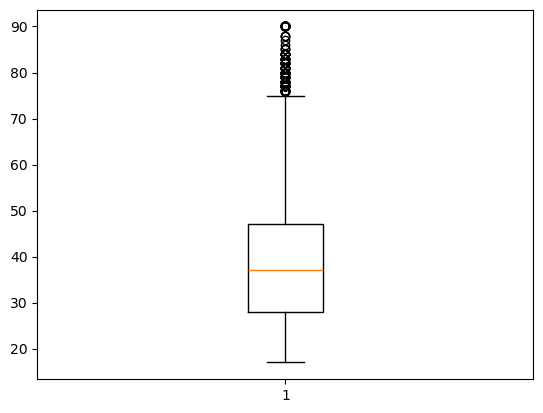

In [16]:
plt.boxplot(data['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

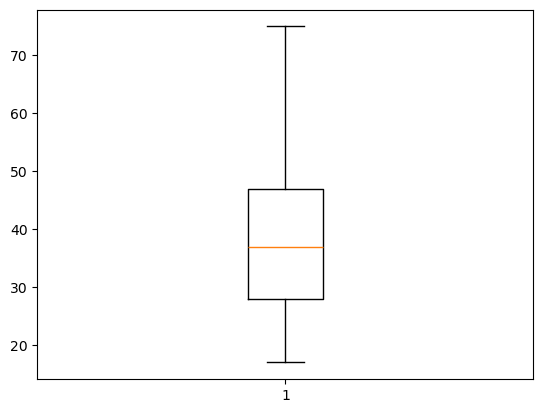

In [17]:
data=data[(data['age']<=75) & (data['age']>=17)]
plt.boxplot(data['age'])
plt.show

In [18]:
data.drop(columns=['education'],inplace=True)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

Encoding the text to num

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital.status']=encoder.fit_transform(data['marital.status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['sex']=encoder.fit_transform(data['sex'])
data['native.country']=encoder.fit_transform(data['native.country'])
data

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,6,186061,10,6,14,4,2,0,0,4356,40,38,<=50K
3,54,2,140359,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,2,264663,10,5,9,3,4,0,0,3900,40,38,<=50K
5,34,2,216864,9,0,7,4,4,0,0,3770,45,38,<=50K
6,38,2,150601,6,5,0,4,4,1,0,3770,40,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,10,4,10,1,4,1,0,0,40,38,<=50K
32557,27,2,257302,12,2,12,5,4,0,0,0,38,38,<=50K
32558,40,2,154374,9,2,6,0,4,1,0,0,40,38,>50K
32559,58,2,151910,9,6,0,4,4,0,0,0,40,38,<=50K


Training Data

In [20]:
#splitting data into x(independent var)=>op and y(dependent var)=>ip. since income is op so remove op from data set for prediction
X=data.drop(columns=['income']) #ip without income
Y=data['income'] #op with only income


In [21]:
#using scalller reduce the range b/w 0 & 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.84482759, 1.        , 0.11802067, ..., 1.        , 0.39795918,
        0.92682927],
       [0.63793103, 0.33333333, 0.08698198, ..., 0.8953168 , 0.39795918,
        0.92682927],
       [0.4137931 , 0.33333333, 0.17140354, ..., 0.8953168 , 0.39795918,
        0.92682927],
       ...,
       [0.39655172, 0.33333333, 0.09650032, ..., 0.        , 0.39795918,
        0.92682927],
       [0.70689655, 0.33333333, 0.09482688, ..., 0.        , 0.39795918,
        0.92682927],
       [0.0862069 , 0.33333333, 0.12849934, ..., 0.        , 0.19387755,
        0.92682927]], shape=(31758, 13))

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=23,stratify=Y)
#test_size attrbt is 0.2 means 20%, it will give 80% to train and 20% for testing
#random_state is to ensure the training and testing data remains same for teration(feedback loop)
#stratify=Y is Y is the output var

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain) #happy image and sad image
predict=knn.predict(xtest) #live image capturing => xtest
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      shape=(6352,), dtype=object)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8340680100755667

In [25]:
#improve accuracy for that we use Multi-Layer-Perceotron classifier from DL
from sklearn.neural_network import MLPClassifier
clf= MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),max_iter=2000,random_state=1)
clf.fit(xtrain,ytrain)
predict1=clf.predict(xtest)
predict1

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(6352,), dtype='<U5')

In [26]:
print(f"Accuracy score using dl technology MLPClassifier is {accuracy_score(ytest,predict1)}")

Accuracy score using dl technology MLPClassifier is 0.8409949622166247


In [27]:
#using Logistuc regression 
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(xtrain,ytrain)
predict2=reg.predict(xtest)
predict2

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(6352,), dtype=object)

In [28]:
print(f"Accuracy score using Logistic regression is {accuracy_score(ytest,predict2)}")

Accuracy score using Logistic regression is 0.8191120906801007


Pickle

In [31]:
import pickle
from sklearn.preprocessing import LabelEncoder

# 1. List of categorical columns that need encoding
categorical_cols = ['workclass', 'marital.status', 'occupation', 
                    'relationship', 'race', 'sex', 'native.country']

# 2. We need to save the actual LabelEncoder objects in a dictionary
# (Note: Use the 'data' dataframe from your notebook before it was split)
encoder_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Assuming 'data' still contains the string values (reload csv if needed)
    # We fit on the original strings so the UI knows the mappings
    le.fit(data[col].astype(str)) 
    encoder_dict[col] = le

# 3. Save the model and the dictionary of encoders
with open('model.pkl', 'wb') as f:
    pickle.dump(reg, f)

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoder_dict, f)

print("Export complete! 'model.pkl' and 'encoders.pkl' are ready.")

Export complete! 'model.pkl' and 'encoders.pkl' are ready.
